# SymPy Tutorial

In [48]:
# Librerie
import sympy as smp
import numpy as np
from matplotlib import pyplot as plt
import scienceplots

plt.style.use(["science", "notebook", "grid"])

## Le basi

In SymPy è possibile definire e lavorare con variabili simboliche

In [8]:
x = smp.symbols("x")
x

x

In [9]:
x**2 # Potenza

x**2

In [60]:
gamma = smp.gamma(x) # Built-in functions
gamma

gamma(x)

E'possibile definire nuove espressioni simboliche a partire dalle variabili definite, per esempio

In [23]:
y = x**2 - 4 * x + 4
y * gamma

(x**2 - 4*x + 4)*gamma(x)

In [24]:
z = y**2
z

(x**2 - 4*x + 4)**2

## Fattorizzare / Espandere un'espressione  
Per fattorizzare un polinomio

In [25]:
y.factor()

(x - 2)**2

Per espandere un'espressione

In [26]:
z.expand()

x**4 - 8*x**3 + 24*x**2 - 32*x + 16

## Il metodo `smp.solve()`

`smp.solve(f, x)` trova il valore di $ x $ tale che $ f(x) = 0 $, è importante scrivere le equazioni in modo che il membro di destra sia $ 0 $ per risolvere un'espressione con `smp.solve()`

In [27]:
smp.solve(z, x)

[2]

In [28]:
smp.solve(smp.sin(x), x)

[0, pi]

### Specificare la natura di una variabile simbolica

**Good practice**: se si conosce la natura di una variabile (numero intero, numero reale, numero complesso, positivo, negativo, ...) è importante specificarla quando la si definisce, per evitare problemi. Per esempio

In [29]:
x = smp.symbols("x")
y = x**2 + 1
smp.solve(y, x) # soluzioni nel campo complesso

[-I, I]

In [31]:
# Se invece volessi le soluzioni nel campo dei numeri reali
x = smp.symbols("x", real = True)
y = x**2 + 1
smp.solve(y, x) # soluzioni nel campo reale

[]

Un altro esempio

In [33]:
x = smp.symbols("x", real = True)
y = x + 4
smp.solve(y, x)

[-4]

In [34]:
x = smp.symbols("x", real = True, positive = True)
y = x + 4
smp.solve(y, x) 

[]

## Espressioni in più variabili
Posso anche definire più variabili allo stesso tempo

In [35]:
x, y, z = smp.symbols("x y z")
F = x**2 + y * smp.sin(z)
F

x**2 + y*sin(z)

Si possono risolvere espressioni in più variabili allo stesso modo

In [40]:
x_sols = smp.solve(F, x)
x_sols

[-sqrt(-y*sin(z)), sqrt(-y*sin(z))]

In [42]:
y_sols = smp.solve(F, y)
y_sols

[-x**2/sin(z)]

In [43]:
z_sols = smp.solve(F, z)
z_sols

[asin(x**2/y) + pi, -asin(x**2/y)]

## Trasformare le espressioni simboliche in funzioni di Python
E' possibile trasformare le espressioni simboliche di SymPy in funzioni di Python, per esempio per plottarle usando NumPy e MatPlotLib

In [44]:
expression = z_sols[0]
expression

asin(x**2/y) + pi

In [46]:
expression_f = smp.lambdify([x, y], expression)
expression_f(1, 2)

3.6651914291880923

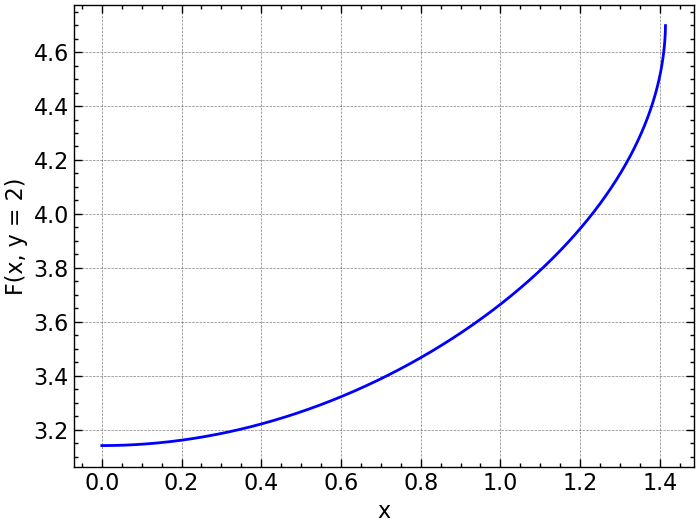

In [62]:
# Plot
x_min = 0.0
x_max = 5.0
x_coord = np.linspace(x_min, x_max, 10000)

fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.set_xlabel("x")
ax.set_ylabel("F(x, y = 2)")
ax.plot(x_coord, expression_f(x_coord, 2), color = "blue", label = "asin(x**2 / y) + pi")

plt.show()

## Sostituzioni
Per funzioni a più variabili, è possibile fare una sostituzione di valori

In [53]:
F

x**2 + y*sin(z)

In [55]:
F.subs([(y, smp.cos(z)), (z, smp.pi / 2)]) # sostituisce y con cos(z) e z con pi / 2

x**2

In [57]:
F.subs([(y, smp.cos(z)), (z, y)]) # sostituisce y con cos(z) e z con y

x**2 + sin(y)*cos(y)